In this project, we'll look at an application of conditional probability — we'll build a spam filter.

Spam is most commonly associated with emails. For instance, unwanted and unsolicited advertising emails are usually classified as spam. Spamming, however, occurs in ways and environments that don't necessarily relate to emails:

* Articles or blog posts can be spammed with comments — the comments are ads or they are repetitive.
* An educational forum may be spammed with posts that are, in fact, ads.
* Mobile phone users may receive unwanted and unsolicited SMS messages, usually about advertising.

In our project, we're going to build a spam filter specifically directed at preventing mobile phone spam. The filter will be able to analyze new messages and tell whether they are spam or not — this way, we might be able to prevent spam from bothering mobile phone users.

To build the spam filter, we're going to use an algorithm called **Naive Bayes** — as the name suggests, the algorithm is based on Bayes' theorem.

Imagine we just got a new SMS message:

* "WINNER! You have 8 hours to claim your money by calling 090061701461. Claim code: KL341."

This must be spam, but how could we create an algorithm that reaches the same conclusion? One thing we might think of is to create a list of words that occurr frequently in spam messages, and then write a bunch of if statements:

* If the word "money" is in the message, then classify the message as spam.
* If the words "secret" and "money" are both in the message, then classify the message as spam; etc.

However, as messages become numerous and more complex, coming up with the right if statements will slowly become very difficult.

Another solution would be to classify a couple of messages ourselves and make the computer learn from our classification. And this is exactly what the Naive Bayes algorithm is about: It makes the computer learn from the classification a humans does, and then the computer uses that knowledge to classify new messages.

The computer uses the specifications of the Naive Bayes algorithm to learn how we classify messages (what counts as spam and non-spam for us), and then it uses that human knowledge to estimate probabilities for new messages. Following the specifications of the algorithm, the computer tries to answer two conditional probability questions:

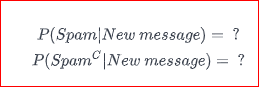

In plain English, these two questions are:

* What's the probability that this new message is spam, given its content (its words, punctuation, letter case, etc.)?
* What's the probability that this new message is non-spam, given its content?

Once it has an answer to these two questions, the computer classifies the message as spam or non-spam based on the probability values. If the probability for spam is greater, then the message is classified as spam. Otherwise, it goes into the non-spam category.

We saw an overview of how the computer may classify new messages using the Naive Bayes algorithm:

* The computer learns how humans classify messages.
* Then it uses that human knowledge to estimate probabilities for new messages — probabilities for spam and non-spam.
* Finally, the computer classifies a new message based on the probability values it calculated in step 2 — if the probability for spam is greater, then it classifies the message as spam. Otherwise, it classifies it as non-spam (if the two probability values are equal, then we may want a human to classify the message ).

When a new message comes in, the algorithm requires the computer to calculate the following probabilities

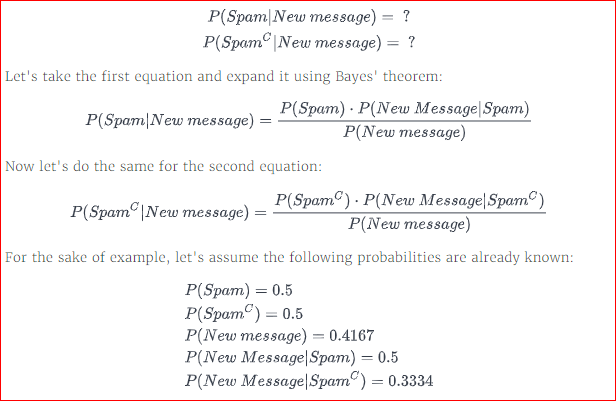


If the computer knows these values, then it can calculate the probabilities it needs to classify a new message:

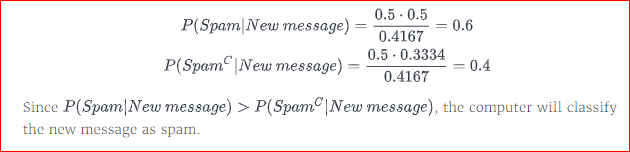

A new mobile message has been received: "URGENT!! You have one day left to claim your $873 prize." The following probabilities are known:

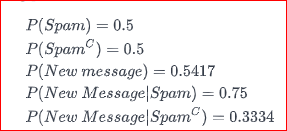

In [6]:
p_spam = 0.5
p_non_spam = 0.5
p_new_message = 0.5417
p_new_message_given_spam = 0.75
p_new_message_given_non_spam = 0.3334

# Calculate P(Spam|New Message).

p_spam_given_new_message = (p_spam*p_new_message_given_spam) /p_new_message

p_non_spam_given_new_message = (p_non_spam * p_new_message_given_non_spam) / p_new_message

print({"spam":p_spam_given_new_message, "non_spam": p_non_spam_given_new_message})

classification = 'spam' # p_spam_given_new_message > p_non_spam_given_new_message

{'spam': 0.6922650913789921, 'non_spam': 0.30773490862100794}


Although we've taken a great first step so far, the actual equations of the Naive Bayes algorithm are a bit different.

When a new message comes in, P(New message) has the same value for both equations. Since we only need to compare the results of the two equations to classify a new message, we can ignore the division:

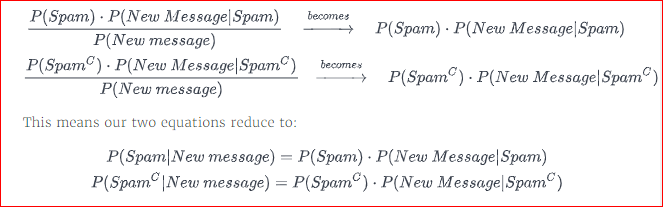

Ignoring the division doesn't affect the algorithm's ability to classify new messages.

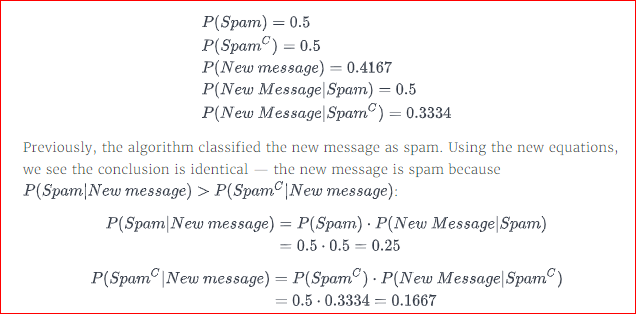

The classification works fine, but ignoring the division changes the probability values, and some probability rules also begin to break. For instance, let's take this conditional probability rule that we've learned

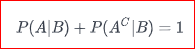

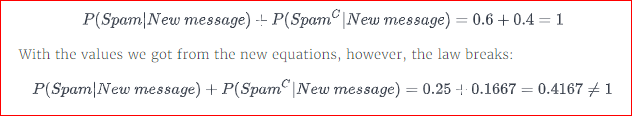

Even though probability rules break, the Naive Bayes algorithm still requires us to ignore the division by P(New message). This might not make a lot of sense, but there's actually a very good reason we do that.

The main goal of the algorithm is to classify new messages, not to calculate probabilities — calculating probabilities is just a means to an end. Ignoring the division by P(New message) means less calculations, which can make a lot of difference when we use the algorithm to classify 500,000 new messages.

The classification itself remains completely unaffected because we ignore division for both equations (not just for one). The probability values change, but they change directly proportional with one another, so the result of the comparison doesn't change.

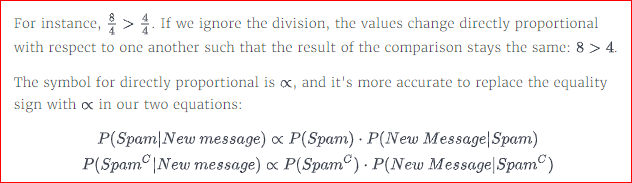

We'll now look at how the algorithm can use messages that are already classified by humans to calculate the values it needs for:

P(Spam) and P(SpamC)
P(New message|Spam) and P(New message|SpamC).

Let's say we have three messages that are already classified:

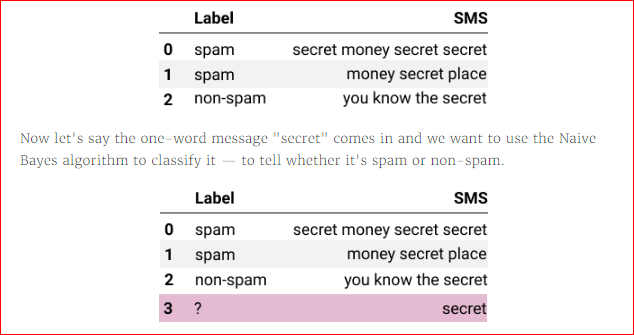

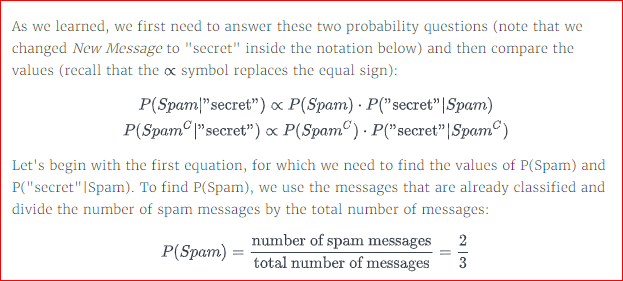

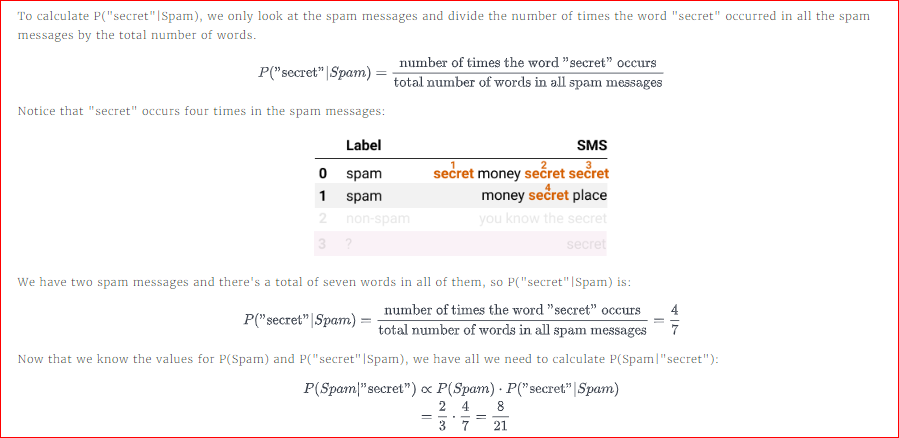

In [5]:
# Calculate P(SpamC)
p_non_spam = 1/3

# Calculate P("secret"|SpamC) 
p_secret_given_non_spam = 1/4

# Calculate P(SpamC|"secret") 
p_non_spam_given_secret = p_non_spam*p_secret_given_non_spam
print({"spam":p_non_spam_given_secret, "non_spam":8/21})

# Compare P(SpamC|"secret") with P(Spam|"secret") 
classification = "Spam"

{'spam': 0.08333333333333333, 'non_spam': 0.38095238095238093}


We used our algorithm to classify the message "secret", and we concluded it's spam. The message "secret" has only one word, but what about the situation where we have to classify messages that have more words?

Let's say we want to classify the message "secret place secret secret" based on four messages that are already classified (the four messages below are different than what what we saw on the previous screen):

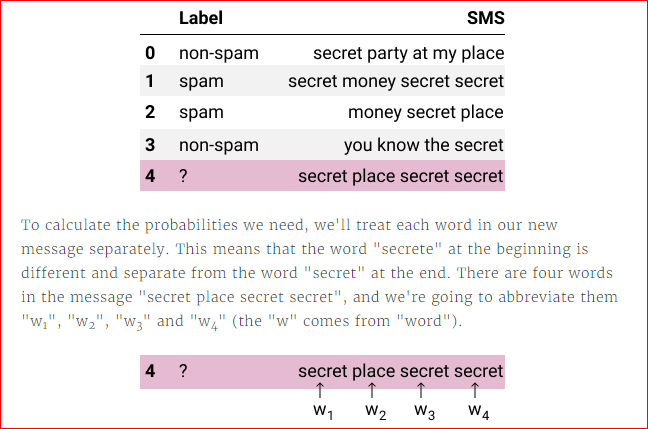

Since we treat each word separately, these are the two equations we can use to calculate the probabilities:

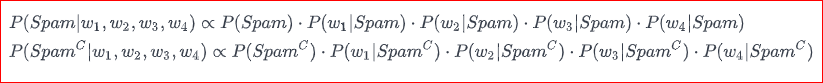

Let's begin with calculating P(Spam|w1, w2, w3, w4). To calculate the probabilities we need, we'll look at the four messages that are already classified. We have four messages and two of them are spam, so:

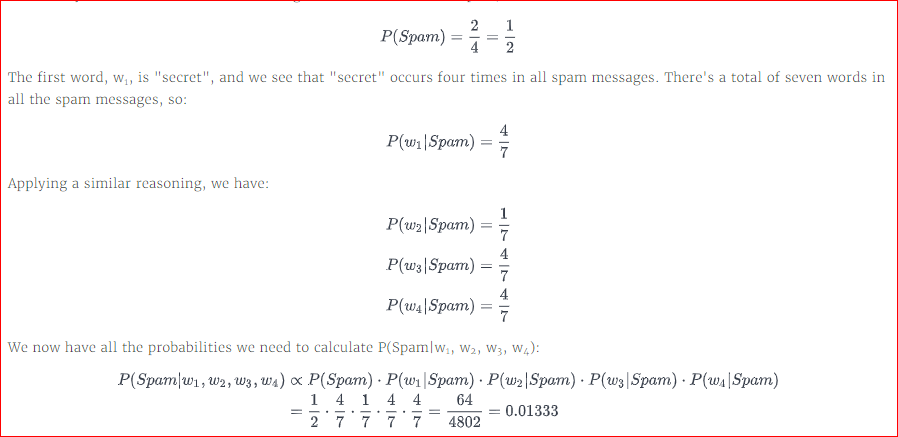

In [7]:
p_spam_given_w1_w2_w3_w4 = 64/4802

# Calculate P(SpamC|w1, w2, w3, w4)
p_non_spam = 2/4

p_w1_given_non_spam = 2/9
p_w2_given_non_spam = 1/9
p_w3_given_non_spam = 2/9
p_w4_given_non_spam = 2/9
p_non_spam_given_w1_w2_w3_w4 = p_non_spam*p_w1_given_non_spam*p_w2_given_non_spam*p_w3_given_non_spam*p_w4_given_non_spam

print({"Spam":p_spam_given_w1_w2_w3_w4,"Non_Spam":p_non_spam_given_w1_w2_w3_w4})

Classification = "Spam" # Spam email is greater than non_spam

{'Spam': 0.013327780091628489, 'Non_Spam': 0.0006096631611034902}


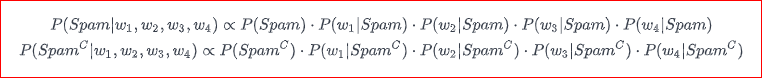

To explain the mathematics behind these equations, let's start by looking at P(Spam|w1, w2, w3, w4). Using the conditional probability formula, we can expand P(Spam|w1, w2, w3, w4) like this 

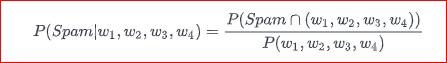

We can ignore the division, which means we can drop P(w1, w2, w3, w4) to avoid redundant calculations

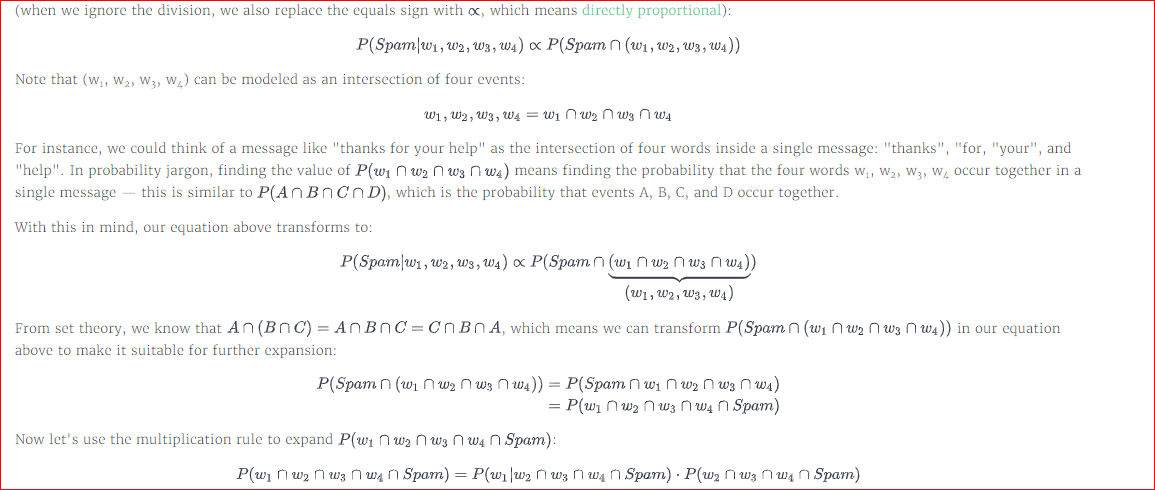

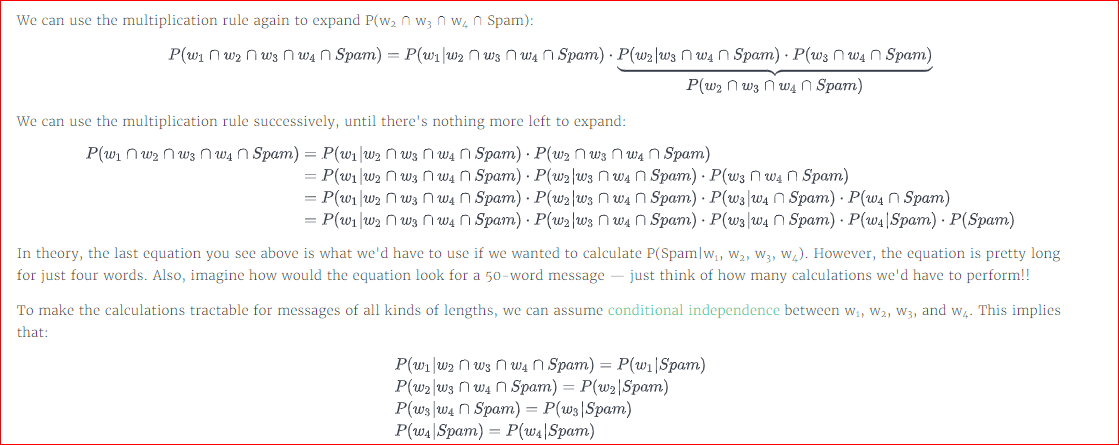

[conditional independence](https://en.wikipedia.org/wiki/Conditional_independence#Conditional_independence_of_events)

Under the assumption of independence, our lengthy equation above reduces to:

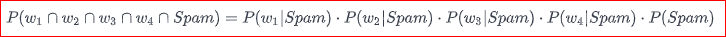

The assumption of conditional independence is unrealistic in practice because words are often in a relationship of dependence. For instance, if you see the word "WINNER" in a message, the probability of seeing the word "money" is very likely to increase, so "WINNER" and "money" are most likely dependent. The assumption of conditional independence between words is thus **naive** since it rarely holds in practice, and this is why the algorithm is called **Naive Bayes** (also called **simple Bayes** or **independence Bayes**).

That being said, we assumed conditional independence when we introduced these two equations:

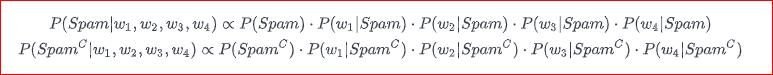

The equations above work for messages that have four words, but we need a more general form to use with messages of various word lengths.

A new message has n words, where n can be any positive integer (1, 2, 3, ..., 50, 51, 53, ...). If we wanted to find P(Spam|w1, w2, ..., wn), then this is an equation we could use:

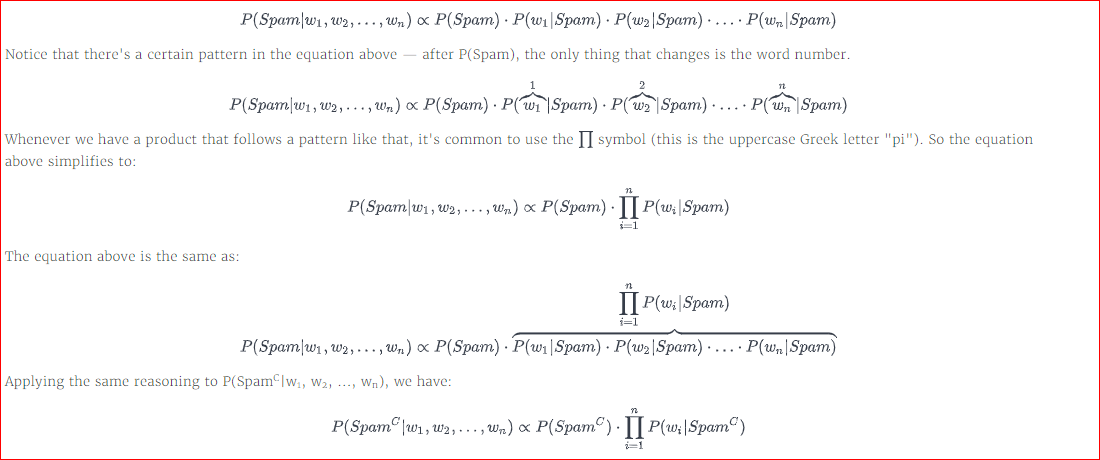

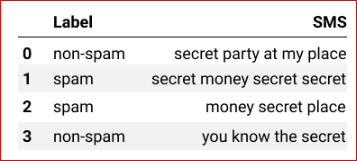

Above, we have four messages and nine unique words: "secret", "party", "at", "my", "place", "money", "you", "know", "the". We call the set of unique words a **vocabulary**.

Now, what if we receive a new message that contains words which are not part of the vocabulary? How do we calculate probabilities for this kind of words?

For instance, say we received the message "secret code to unlock the money".

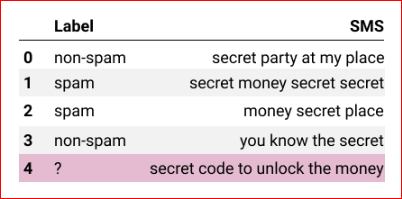

Notice that for this new message:

* The words "code", "to", and "unlock" are not part of the vocabulary.
* The word "secret" is part of both spam and non-spam messages.
* The word "money" is only part of the spam messages and is missing from the non-spam messages.
* The word "the" is missing from the spam messages and is only part of the non-spam messages.

Whenever we have to deal with words that are not part of the vocabulary, one solution is to ignore them when we're calculating probabilities. If we wanted to calculate P(Spam|"secret code to unlock the money"), we could skip calculating P("code"|Spam), P("to"|Spam), and P("unlock"|Spam) because "code", "to", and "unlock" are not part of the vocabulary:

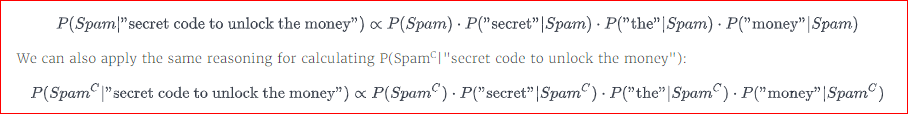

In [8]:
p_spam = 2/4
p_secret_given_spam = 4/7
p_the_given_spam = 0/7
p_money_given_spam = 2/7

# P(Spam|"secret code to unlock the money")
p_spam_given_message = (p_spam * p_secret_given_spam * p_the_given_spam * p_money_given_spam)

p_non_spam = 2/4
p_secret_given_non_spam = 2/9
p_the_given_non_spam = 1/9
p_money_given_non_spam = 0/9

# P(SpamC|"secret code to unlock the money")

p_non_spam_given_message = (p_non_spam * p_secret_given_non_spam *
                            p_the_given_non_spam * p_money_given_non_spam)


print(p_spam_given_message)
print(p_non_spam_given_message)

0.0
0.0


We saw that both P(Spam|"secret code to unlock the money") and P(SpamC|"secret code to unlock the money") were equal to 0. This will always happen when we have words that occur in only one category — "money" occurs only in spam messages, while "the" only occurs in non-spam messages. 

Unfortunately, that single value of 0 has the drawback of turning the result of the entire equation to 0. To fix this problem, we need to find a way to avoid these cases where we get probabilities of 0. Let's start by laying out the equation we're using to calculate P("the"|Spam):

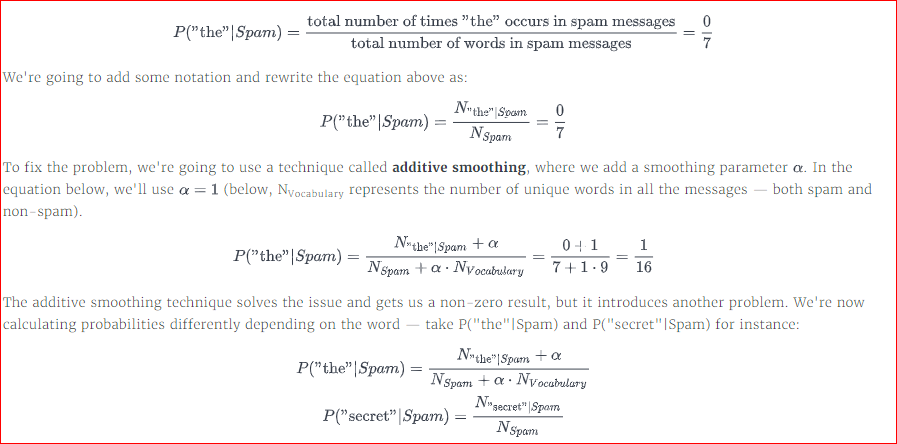

Words like "the" are thus given special treatment and their probability are increased artificially to avoid non-zero cases, while words like "secret" are treated normally. To keep the probability values proportional across all words, we're going to use the additive smoothing for every word:

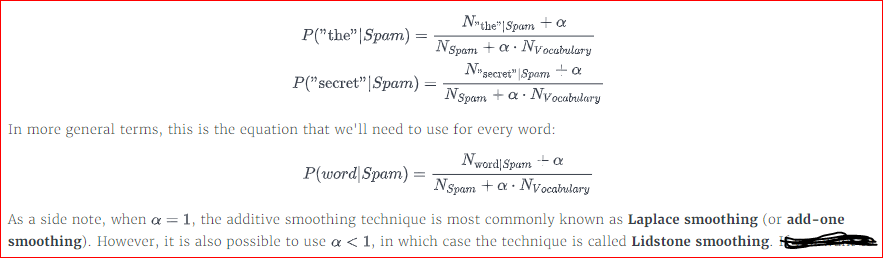

[additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)

In [10]:
# calculating the probabilities for the message "secret code to unlock the money" aftet Laplace Smoothing

p_spam = 2/4
p_secret_given_spam = (4 + 1) / (7 + 9)
p_the_given_spam = (0 + 1) / (7 + 9)
p_money_given_spam = (2 + 1) / (7 + 9)
p_spam_given_message = (p_spam * p_secret_given_spam *
                        p_the_given_spam * p_money_given_spam)
p_non_spam = 2/4
p_secret_given_non_spam = (2 + 1) / (9 + 9)
p_the_given_non_spam = (1 + 1) / (9 + 9)
p_money_given_non_spam = (0 + 1) / (9 + 9)
p_non_spam_given_message = (p_non_spam * p_secret_given_non_spam *
                            p_the_given_non_spam * p_money_given_non_spam)

print(p_spam_given_message)
print(p_non_spam_given_message)

classification = 'spam'

0.0018310546875
0.0005144032921810699


The Naive Bayes algorithm can be used for more than just building spam filters. For instance, we could use it to perform sentiment analysis for Twitter messages — the input is a Twitter message, and the output is the sentiment type (positive or negative). This follows the same pattern we saw with our spam filter, where the input is a new SMS message and the output is the message type (spam or non-spam).

Depending on the math and the assumptions used, the Naive Bayes algorithm has a few variations. The three most popular Naive Bayes algorithms are:

* Multinomial Naive Bayes
* Gaussian Naive Bayes
* Bernoulli Naive Bayes

In this project, we learned the **multinomial Naive Bayes** version of the algorithm. It's important to keep in mind that all the Naive Bayes algorithms build on the (naive) conditional independence assumption we learned about earlier in this project.